<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicações com Python/Descritiva II - Análise descritiva para resposta contínuaome/Profissao- Cientista de Dados_M10_support material.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


**Abaixo temo uma analise descritiva das variáveis quantitativas**

In [5]:
selected_columns = ["qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "renda"]
data[selected_columns].describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,0.437267,43.84140,7.750462,2.219067,4624.632946
std,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,22.00000,0.191781,1.000000,159.900000
25%,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14.000000,68.00000,42.906849,15.000000,89918.040000


**Calculando a correlação entre as variáveis quantitativas**

In [6]:
data_numerical_features = data.select_dtypes(include=np.number)
data_numerical_features[selected_columns].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


**Utilizando o clustermap para vizualizar a correlação da matriza de dispersão**

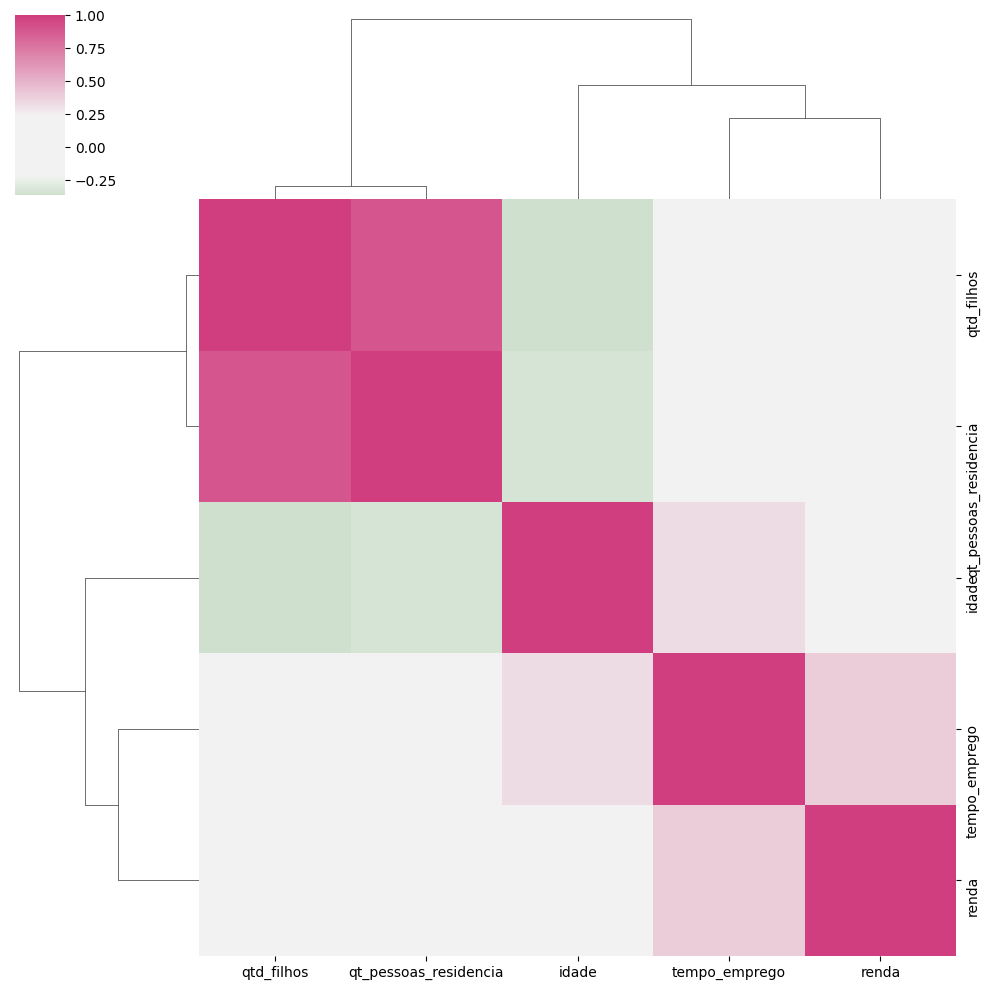

In [9]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(data_numerical_features[selected_columns].corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

**Vamos utilizar o tempo de emprego, já que apresentou maior corelação com renda**

<Axes: xlabel='tempo_emprego', ylabel='renda'>

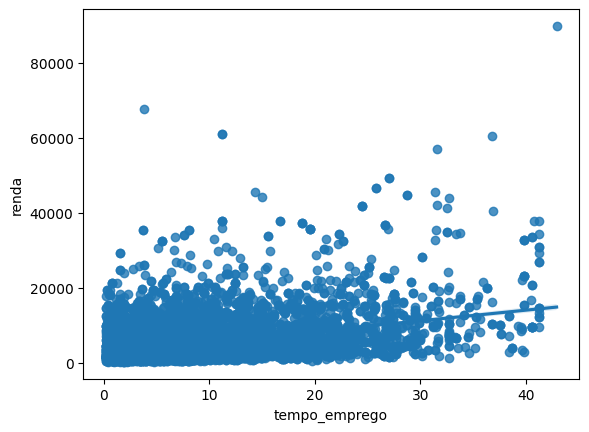

In [17]:
sns.regplot(y='renda', x='tempo_emprego', data=data)

3) Na su aopinião, há outliers na variável renda?

<Axes: xlabel='renda'>

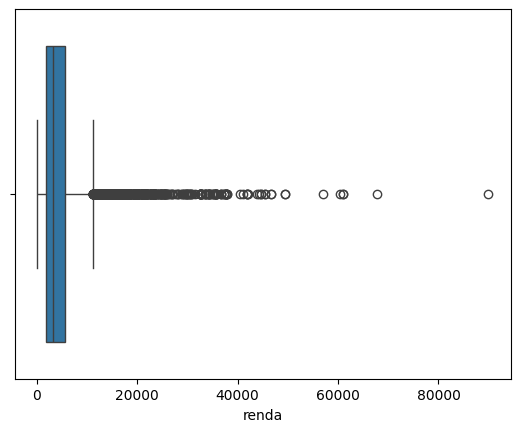

In [13]:
# box plot
sns.boxplot(x=data['renda'])

**Pelo Grafico de boxplot percebemos que temos possíveis outliers na amostra, porém algumas análises precisam ser feito para identificar se realmente são, principalmente aqueles que tem pouco tempo de trabalho e tem uma renda muito alta**

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

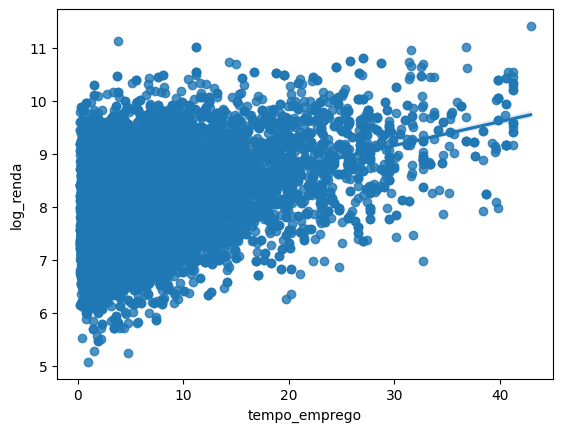

In [26]:
data_log = data_numerical_features.copy()
data_log['log_renda'] = np.log(data_log['renda'])
sns.regplot(y='log_renda', x='tempo_emprego', data=data_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [28]:
selected_columns_1 = ["qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "renda", "log_renda"]
data_log[selected_columns_1].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


**A analise via Log piorou a correlação, então para essa amostra não faz sentido esse tratamento**